In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

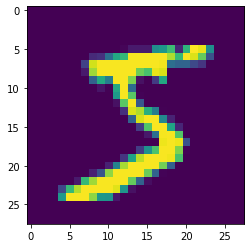

In [9]:
plt.imshow(x_train[0])

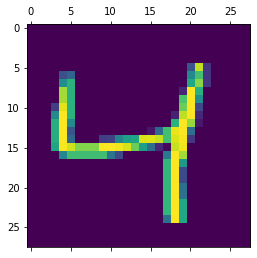

In [10]:
plt.matshow(x_train[2])

In [9]:
x_train_flatten = x_train.reshape(len(x_train),28*28)
x_train_flatten.shape

(60000, 784)

In [10]:
x_test_flatten = x_test.reshape(len(x_test),28*28)

In [11]:
x_train_flatten[0].shape

(784,)

In [12]:
#without scaling
model = keras.Sequential([
     keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])
    
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 16.6903 - accuracy: 0.7763
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 6.2685 - accuracy: 0.8748: 0s - loss:
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 5.6879 - accuracy: 0.8827: 0s - loss: 5.6812 
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 5.2003 - accuracy: 0.8885
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 5.2987 - accuracy: 0.8895


In [13]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 6.6147 - accuracy: 0.8751


[6.6146650314331055, 0.8751000165939331]

In [14]:
x_train_flatten = x_train_flatten/255
x_test_flatten = x_test_flatten/255

In [15]:
#after scaling
model = keras.Sequential([
     keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])
    
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.7334 - accuracy: 0.8065 1s - loss: 0.7 - E
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3126 - accuracy: 0.9132
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2828 - accuracy: 0.9193
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2722 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2661 - accuracy: 0.9251


In [16]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2676 - accuracy: 0.9260


[0.26762479543685913, 0.9259999990463257]

In [17]:
y_pred = model.predict(x_test_flatten)

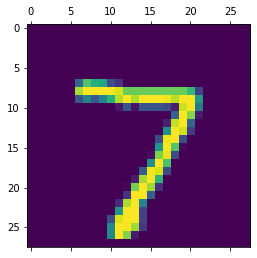

In [18]:
plt.matshow(x_test[0])

In [19]:
np.argmax(y_pred[0])

7

In [20]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [21]:
y_predicted_labels = [np.argmax(i) for i in y_pred]

In [22]:
cm = tf.math.confusion_matrix(y_test,y_predicted_labels)

Text(69.0, 0.5, 'Actual')

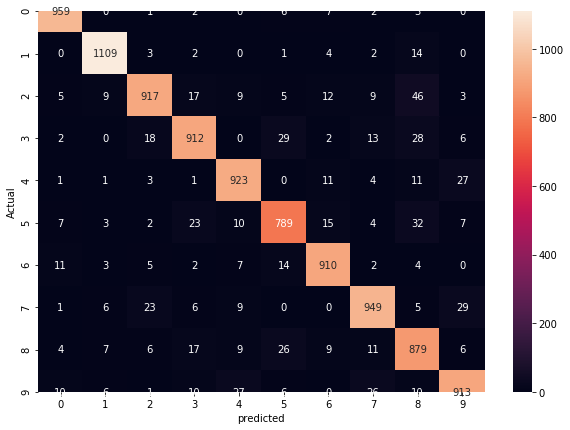

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("Actual")

In [24]:
model = keras.Sequential([
     keras.layers.Dense(100,input_shape=(784,),activation="sigmoid"),
     keras.layers.Dense(10,activation="sigmoid")
])
    
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6916 - accuracy: 0.8351
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2214 - accuracy: 0.9376 1s - l - E - ETA: 0s - loss: 0.2216 - accuracy
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1623 - accuracy: 0.9535
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1225 - accuracy: 0.9645
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0981 - accuracy: 0.9724


In [25]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.1057 - accuracy: 0.9687


[0.10571432113647461, 0.9686999917030334]

In [26]:
y_pred = model.predict(x_test_flatten)

In [27]:
y_predicted_labels = [np.argmax(i) for i in y_pred]

In [28]:
cm1 = tf.math.confusion_matrix(y_test,y_predicted_labels)

Text(69.0, 0.5, 'Actual')

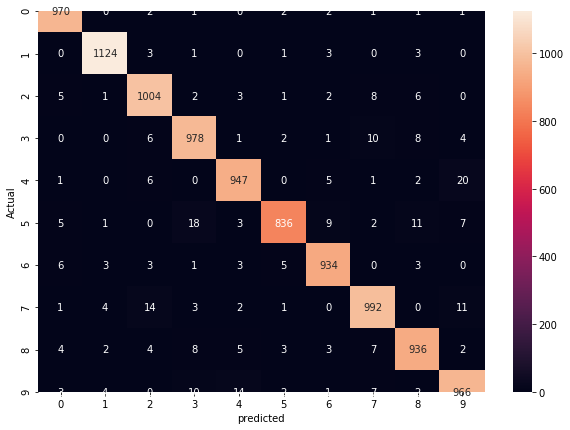

In [29]:
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("Actual")

In [30]:
model = keras.Sequential([
     keras.layers.Flatten(input_shape=(28,28)),
     keras.layers.Dense(100,activation="sigmoid"),
     keras.layers.Dense(10,activation="sigmoid")
])
    
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train/255,y_train,epochs=25)

Epoch 1/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7053 - accuracy: 0.8331
Epoch 2/25
1875/1875 [==============================] - 2s 910us/step - loss: 0.2251 - accuracy: 0.9365
Epoch 3/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1587 - accuracy: 0.9555
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1203 - accuracy: 0.9653
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0985 - accuracy: 0.9724
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0796 - accuracy: 0.9770
Epoch 7/25
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0693 - accuracy: 0.9813
Epoch 8/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0580 - accuracy: 0.9844
Epoch 9/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0489 - accuracy: 0.9876
Epoch 10/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0

In [31]:
model.evaluate(x_test/255,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0868 - accuracy: 0.9778


[0.08677554130554199, 0.9778000116348267]

In [12]:
(train_x,train_y),(test_x,test_y) = keras.datasets.mnist.load_data()

In [13]:
train_x.shape

(60000, 28, 28)

In [15]:
train_x = train_x.reshape(-1,28,28,1)
test_x = test_x.reshape(-1,28,28,1)

In [16]:
train_x = train_x/255
test_x = test_x/255

In [18]:
cnn = keras.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation="relu"),
    layers.MaxPool2D(pool_size=(2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPool2D(pool_size=(2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

cnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)



In [19]:
cnn.fit(train_x,train_y,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3383 - accuracy: 0.8945
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0506 - accuracy: 0.9852
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0317 - accuracy: 0.9900
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0250 - accuracy: 0.9925
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0195 - accuracy: 0.9939


In [20]:
cnn.evaluate(test_x,test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.0243 - accuracy: 0.9914


[0.02432652749121189, 0.9914000034332275]

In [21]:
y_pred = cnn.predict(test_x)

In [22]:
y_classes = [np.argmax(i) for i in y_pred]

In [23]:
test_y[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [24]:
y_classes[:5]

[7, 2, 1, 0, 4]

In [27]:
cm2 = tf.math.confusion_matrix(test_y,y_classes)

Text(69.0, 0.5, 'Actual')

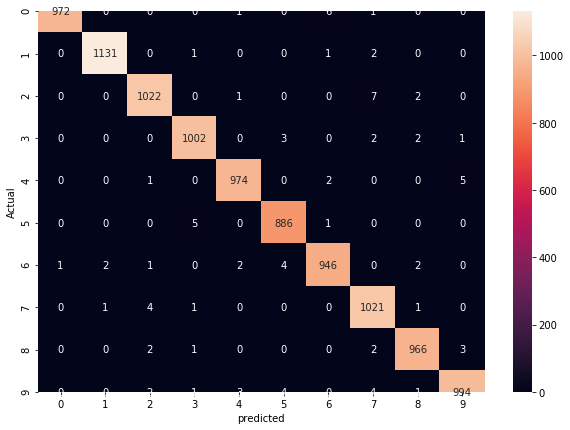

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(cm2,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("Actual")